<a href="https://colab.research.google.com/github/Natassiam/machineLearning/blob/teste/trab_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset obtido pela base ONS

Importando bibliotecas

In [352]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder



carregando Dataset

In [353]:
df = pd.read_csv('/content/Simple_Geration_ONS.csv', sep=';')

In [354]:
df.head()

,dsc_estado,id_subsistema,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,nom_usina2,Período Verifica GE Simp 4,Selecione Tipo de GE Simp 4,Din Instante,Din Instante GE Simp 4,Table Name,Val Geraenergiacongwh,Val Geraenergiaconmwmed,Produção
0,CEARA,Nordeste,Tipo III,Eólica,Eólica,Prainha,VERDADEIRO,0.00,31/12/2020 00:00,01/12/2020 00:00,gr_meusinaprevcarga,0.000000,0.000000,NaN
1,BAHIA,Nordeste,Tipo III,Eólica,Eólica,VENTOS DA BAHIA XVII,VERDADEIRO,11.95,31/12/2020 00:00,01/12/2020 00:00,gr_meusinaprevcarga,8.891672,11.951172,NaN
2,CEARA,Nordeste,Tipo III,Eólica,Eólica,Eólica de Taíba,VERDADEIRO,1.88,31/12/2020 00:00,01/12/2020 00:00,gr_meusinaprevcarga,1.397629,1.878534,NaN
3,ALAGOAS,Nordeste,Tipo I,Hidráulica,Hidrelétrica,XINGÓ,VERDADEIRO,2494.88,31/12/2020 00:00,01/12/2020 00:00,gr_meusinaprevcarga,1856.189991,2494.879020,NaN
4,PARAIBA,Nordeste,Tipo III,Eólica,Eólica,Alhandra,VERDADEIRO,0.00,31/12/2020 00:00,01/12/2020 00:00,gr_meusinaprevcarga,0.000000,0.000000,NaN


In [355]:
df.groupby(by='nom_tipocombustivel2').size()

nom_tipocombustivel2
Biomassa                 3151
Carvão                    198
Eólica                  34631
Fotovoltaica             3508
Gás                      1644
Gás natural               286
Hidráulica               5116
Petróleo                  504
Resíduos Industriais       72
Óleo Combustível         1695
Óleo Diesel              4172
dtype: int64

In [356]:
df.groupby(by='nom_tipousinasite').size()

nom_tipousinasite
Eólica          34631
Hidrelétrica     5116
Solar            3508
Térmica         11722
dtype: int64

In [357]:
df.groupby(by='Modalidade de Operação').size()

Modalidade de Operação
Conjunto de Usinas       92
Pequenas Usinas         200
Tipo I                 8312
Tipo II-A              2615
Tipo II-B               372
Tipo II-C             32441
Tipo III              10945
dtype: int64

In [358]:
df.groupby(by='dsc_estado').size()

dsc_estado
ALAGOAS                 1451
BAHIA                  16553
CEARA                   9303
MARANHAO                  36
PARAIBA                 2041
PERNAMBUCO              6055
PIAUI                   6330
RIO GRANDE DO NORTE    12214
SAO PAULO                 24
SERGIPE                  514
TOCANTINS                456
dtype: int64

In [359]:
df["Modalidade de Operação"] = df["Modalidade de Operação"].astype('category')
df.dtypes

dsc_estado                       object
id_subsistema                    object
Modalidade de Operação         category
nom_tipocombustivel2             object
nom_tipousinasite                object
nom_usina2                       object
Período Verifica GE Simp 4       object
Selecione Tipo de GE Simp 4     float64
Din Instante                     object
Din Instante GE Simp 4           object
Table Name                       object
Val Geraenergiacongwh           float64
Val Geraenergiaconmwmed         float64
Produção                        float64
dtype: object

In [360]:
df["nom_tipousinasite"] = df["nom_tipousinasite"].astype('category')
df.dtypes

dsc_estado                       object
id_subsistema                    object
Modalidade de Operação         category
nom_tipocombustivel2             object
nom_tipousinasite              category
nom_usina2                       object
Período Verifica GE Simp 4       object
Selecione Tipo de GE Simp 4     float64
Din Instante                     object
Din Instante GE Simp 4           object
Table Name                       object
Val Geraenergiacongwh           float64
Val Geraenergiaconmwmed         float64
Produção                        float64
dtype: object

In [361]:
df["nom_tipocombustivel2"] = df["nom_tipocombustivel2"].astype('category')
df.dtypes

dsc_estado                       object
id_subsistema                    object
Modalidade de Operação         category
nom_tipocombustivel2           category
nom_tipousinasite              category
nom_usina2                       object
Período Verifica GE Simp 4       object
Selecione Tipo de GE Simp 4     float64
Din Instante                     object
Din Instante GE Simp 4           object
Table Name                       object
Val Geraenergiacongwh           float64
Val Geraenergiaconmwmed         float64
Produção                        float64
dtype: object

In [404]:
df["dsc_estado"] = df["dsc_estado"].astype('category')
df.dtypes

dsc_estado                     category
Modalidade de Operação             int8
nom_tipocombustivel2               int8
nom_tipousinasite                  int8
Selecione Tipo de GE Simp 4     float64
Din Instante                     object
Din Instante GE Simp 4           object
Val Geraenergiacongwh           float64
Val Geraenergiaconmwmed         float64
dtype: object

In [414]:
#df['dsc_estado'] = df['dsc_estado'].cat.codes
#df.info()
#df['Modalidade de Operação'] = df['Modalidade de Operação'].cat.codes
#df.info()
#df['nom_tipocombustivel2'] = df['nom_tipocombustivel2'].cat.codes
#df.info()
#df['nom_tipousinasite'] = df['nom_tipousinasite'].cat.codes
#df.info()
df['dsc_estado'] = df['dsc_estado'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54977 entries, 0 to 54976
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dsc_estado                   54977 non-null  int8   
 1   Modalidade de Operação       54977 non-null  int8   
 2   nom_tipocombustivel2         54977 non-null  int8   
 3   nom_tipousinasite            54977 non-null  int8   
 4   Selecione Tipo de GE Simp 4  54977 non-null  float64
 5   Din Instante                 54977 non-null  object 
 6   Din Instante GE Simp 4       54977 non-null  object 
 7   Val Geraenergiacongwh        54977 non-null  float64
 8   Val Geraenergiaconmwmed      54977 non-null  float64
dtypes: float64(3), int8(4), object(2)
memory usage: 2.7+ MB


In [415]:
#Numero de categorias dos atributos categoricos
#(columns['Demanda','Modalidade de Operação','nom_usina2','nom_tipocombustivel2', 'Table Name','Período Verifica GE Simp 4'])
#print(df_cat.nunique()) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54977 entries, 0 to 54976
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dsc_estado                   54977 non-null  int8   
 1   Modalidade de Operação       54977 non-null  int8   
 2   nom_tipocombustivel2         54977 non-null  int8   
 3   nom_tipousinasite            54977 non-null  int8   
 4   Selecione Tipo de GE Simp 4  54977 non-null  float64
 5   Din Instante                 54977 non-null  object 
 6   Din Instante GE Simp 4       54977 non-null  object 
 7   Val Geraenergiacongwh        54977 non-null  float64
 8   Val Geraenergiaconmwmed      54977 non-null  float64
dtypes: float64(3), int8(4), object(2)
memory usage: 2.7+ MB


In [416]:
df.describe()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
count,54977.000000,54977.000000,54977.000000,54977.000000,54977.000000,5.497700e+04,5.497700e+04
mean,3.757244,4.620696,3.269822,0.860323,33.644222,2.458649e+01,3.364422e+01
std,2.619219,1.308827,2.642626,1.235763,163.130203,1.192393e+02,1.631302e+02
min,0.000000,0.000000,0.000000,0.000000,-0.280000,-1.998000e-01,-2.775000e-01
25%,1.000000,5.000000,2.000000,0.000000,0.000000,5.000000e-08,7.000000e-08
50%,4.000000,5.000000,2.000000,0.000000,7.120000,5.173655e+00,7.122796e+00
75%,6.000000,5.000000,3.000000,2.000000,13.980000,1.026257e+01,1.398177e+01
max,10.000000,6.000000,10.000000,3.000000,2864.860000,2.131460e+03,2.864865e+03


Remoção Atributos Table Name e Período Verifica GE Simp 4

In [417]:
df.head()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Din Instante,Din Instante GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
0,2,6,2,0,0.00,31/12/2020 00:00,01/12/2020 00:00,0.000000,0.000000
1,1,6,2,0,11.95,31/12/2020 00:00,01/12/2020 00:00,8.891672,11.951172
2,2,6,2,0,1.88,31/12/2020 00:00,01/12/2020 00:00,1.397629,1.878534
3,0,2,6,1,2494.88,31/12/2020 00:00,01/12/2020 00:00,1856.189991,2494.879020
4,4,6,2,0,0.00,31/12/2020 00:00,01/12/2020 00:00,0.000000,0.000000


In [418]:
#Salvando ons_basereduzida1.csv transformado
df = pd.DataFrame(df)
df.to_csv('ons_basereduzida1.csv')
# Importando arquivo transformado
from google.colab import files
#Aprendizado de Máquina – DIM0872 58
files.download('ons_basereduzida1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

In [420]:
df.head()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Din Instante,Din Instante GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
0,2,6,2,0,0.00,31/12/2020 00:00,01/12/2020 00:00,0.000000,0.000000
1,1,6,2,0,11.95,31/12/2020 00:00,01/12/2020 00:00,8.891672,11.951172
2,2,6,2,0,1.88,31/12/2020 00:00,01/12/2020 00:00,1.397629,1.878534
3,0,2,6,1,2494.88,31/12/2020 00:00,01/12/2020 00:00,1856.189991,2494.879020
4,4,6,2,0,0.00,31/12/2020 00:00,01/12/2020 00:00,0.000000,0.000000


**Binarização Atributo**

In [421]:
df_cat = pd.get_dummies(df_cat)

In [422]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54977 entries, 0 to 54976
Columns: 855 entries, Modalidade de Operação_Conjunto de Usinas to Período Verifica GE Simp 4_VERDADEIRO
dtypes: uint8(855)
memory usage: 44.8 MB


**Binarização Classe**

In [423]:
demanda = df.filter(items=['Demanda'])
demanda = pd.get_dummies('Demanda')
demanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Demanda  1 non-null      uint8
dtypes: uint8(1)
memory usage: 129.0 bytes


**Apresentando os tipos de dados da base**

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54977 entries, 0 to 54976
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dsc_estado                   54977 non-null  int8   
 1   Modalidade de Operação       54977 non-null  int8   
 2   nom_tipocombustivel2         54977 non-null  int8   
 3   nom_tipousinasite            54977 non-null  int8   
 4   Selecione Tipo de GE Simp 4  54977 non-null  float64
 5   Din Instante                 54977 non-null  object 
 6   Din Instante GE Simp 4       54977 non-null  object 
 7   Val Geraenergiacongwh        54977 non-null  float64
 8   Val Geraenergiaconmwmed      54977 non-null  float64
dtypes: float64(3), int8(4), object(2)
memory usage: 2.7+ MB


Selecionando os tipos objeto e apresentando na cabeça

In [373]:
#df.select_dtypes(include='float').head()

In [425]:
df.corr()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
dsc_estado,1.000000,0.129409,-0.103715,-0.129374,-0.121932,-0.121862,-0.121932
Modalidade de Operação,0.129409,1.000000,-0.642540,-0.424195,-0.300635,-0.300425,-0.300635
nom_tipocombustivel2,-0.103715,-0.642540,1.000000,0.584500,0.137396,0.137267,0.137396
nom_tipousinasite,-0.129374,-0.424195,0.584500,1.000000,0.052476,0.052371,0.052476
Selecione Tipo de GE Simp 4,-0.121932,-0.300635,0.137396,0.052476,1.000000,0.999638,1.000000
Val Geraenergiacongwh,-0.121862,-0.300425,0.137267,0.052371,0.999638,1.000000,0.999638
Val Geraenergiaconmwmed,-0.121932,-0.300635,0.137396,0.052476,1.000000,0.999638,1.000000


Fazendo a transformação dos dados da coluna Val Geraenergiacongwh para numerico

In [375]:
#df['Val Geraenergiacongwh'] = df['Val Geraenergiacongwh'].astype(float)

In [376]:
#dn = df['Val Geraenergiacongwh'].astype(str).str.replace("," , ".").astype(float)

In [377]:
dn.mean()

24.586490363251798

In [426]:
df.isnull().sum()

dsc_estado                     0
Modalidade de Operação         0
nom_tipocombustivel2           0
nom_tipousinasite              0
Selecione Tipo de GE Simp 4    0
Din Instante                   0
Din Instante GE Simp 4         0
Val Geraenergiacongwh          0
Val Geraenergiaconmwmed        0
dtype: int64

In [427]:
df['Val Geraenergiacongwh'].value_counts()

0.000000      13711
0.000001         38
0.000002         14
14.880000        13
11.160000        11
              ...  
111.833713        1
1.761113          1
6.782204          1
8.067081          1
6.760351          1
Name: Val Geraenergiacongwh, Length: 41052, dtype: int64

Descrevendo os dados


In [428]:
df.describe()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
count,54977.000000,54977.000000,54977.000000,54977.000000,54977.000000,5.497700e+04,5.497700e+04
mean,3.757244,4.620696,3.269822,0.860323,33.644222,2.458649e+01,3.364422e+01
std,2.619219,1.308827,2.642626,1.235763,163.130203,1.192393e+02,1.631302e+02
min,0.000000,0.000000,0.000000,0.000000,-0.280000,-1.998000e-01,-2.775000e-01
25%,1.000000,5.000000,2.000000,0.000000,0.000000,5.000000e-08,7.000000e-08
50%,4.000000,5.000000,2.000000,0.000000,7.120000,5.173655e+00,7.122796e+00
75%,6.000000,5.000000,3.000000,2.000000,13.980000,1.026257e+01,1.398177e+01
max,10.000000,6.000000,10.000000,3.000000,2864.860000,2.131460e+03,2.864865e+03


Selecionando amostra de 100 elementos


In [381]:
df.sample(100, replace= True)

,dsc_estado,id_subsistema,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,nom_usina2,Período Verifica GE Simp 4,Selecione Tipo de GE Simp 4,Din Instante,Din Instante GE Simp 4,Table Name,Val Geraenergiacongwh,Val Geraenergiaconmwmed,Produção
39628,BAHIA,Nordeste,5,2,0,DELFINA 7,VERDADEIRO,0.00,29/02/2016 00:00,01/02/2016 00:00,gr_meusinaprevcarga,0.000000,0.000000,NaN
35174,CEARA,Nordeste,5,2,0,VOLTA DO RIO,VERDADEIRO,13.61,31/10/2016 00:00,01/10/2016 00:00,gr_meusinaprevcarga,10.122523,13.605542,NaN
39019,BAHIA,Nordeste,5,2,0,EOL INHAMBU - CAETITE BH,VERDADEIRO,10.34,31/03/2016 00:00,01/03/2016 00:00,gr_meusinaprevcarga,7.691794,10.338433,NaN
3150,BAHIA,Nordeste,5,2,0,NOVO HORIZONTE - EOL N HORIZ,VERDADEIRO,19.21,31/08/2020 00:00,01/08/2020 00:00,gr_meusinaprevcarga,14.290815,19.208084,NaN
35590,ALAGOAS,Nordeste,6,0,3,CORURIPE (ACEP),VERDADEIRO,8.08,31/10/2016 00:00,01/10/2016 00:00,gr_meusinaprevcarga,6.010435,8.078542,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49253,BAHIA,Nordeste,2,9,3,CAMAÇARI PÓLO DE APOIO I,VERDADEIRO,0.52,31/12/2011 00:00,01/12/2011 00:00,gr_meusinaprevcarga,0.387470,0.520793,NaN
9296,PARAIBA,Nordeste,6,0,3,AGRO INDUSTRIAL TABU,VERDADEIRO,0.00,31/01/2020 00:00,01/01/2020 00:00,gr_meusinaprevcarga,0.000000,0.000000,NaN
49893,BAHIA,Nordeste,2,9,3,GLOBAL II,VERDADEIRO,0.00,31/01/2011 00:00,01/01/2011 00:00,gr_meusinaprevcarga,0.000000,0.000000,NaN
10349,CEARA,Nordeste,5,2,0,VOLTA DO RIO,VERDADEIRO,10.51,30/11/2019 00:00,01/11/2019 00:00,gr_meusinaprevcarga,7.567332,10.510183,NaN


In [382]:
df.head

<bound method NDFrame.head of       dsc_estado id_subsistema  ...  Val Geraenergiaconmwmed  Produção
0          CEARA      Nordeste  ...                 0.000000       NaN
1          BAHIA      Nordeste  ...                11.951172       NaN
2          CEARA      Nordeste  ...                 1.878534       NaN
3        ALAGOAS      Nordeste  ...              2494.879020       NaN
4        PARAIBA      Nordeste  ...                 0.000000       NaN
...          ...           ...  ...                      ...       ...
54972      BAHIA      Nordeste  ...               274.470833       NaN
54973      BAHIA      Nordeste  ...               540.765188       NaN
54974      BAHIA      Nordeste  ...               641.832796       NaN
54975      BAHIA      Nordeste  ...                 9.314785       NaN
54976      BAHIA      Nordeste  ...                 0.106989       NaN

[54977 rows x 14 columns]>

Observando os tipos de dados (atençao para os numericos)


In [429]:
df.dtypes

dsc_estado                        int8
Modalidade de Operação            int8
nom_tipocombustivel2              int8
nom_tipousinasite                 int8
Selecione Tipo de GE Simp 4    float64
Din Instante                    object
Din Instante GE Simp 4          object
Val Geraenergiacongwh          float64
Val Geraenergiaconmwmed        float64
dtype: object

Colunas do dataframe

In [384]:
df.columns

Index(['dsc_estado', 'id_subsistema', 'Modalidade de Operação',
       'nom_tipocombustivel2', 'nom_tipousinasite', 'nom_usina2',
       'Período Verifica GE Simp 4', 'Selecione Tipo de GE Simp 4',
       'Din Instante', 'Din Instante GE Simp 4', 'Table Name',
       'Val Geraenergiacongwh', 'Val Geraenergiaconmwmed', 'Produção'],
      dtype='object')

In [430]:
df.head().T

,0,1,2,3,4
dsc_estado,2,1,2,0,4
Modalidade de Operação,6,6,6,2,6
nom_tipocombustivel2,2,2,2,6,2
nom_tipousinasite,0,0,0,1,0
Selecione Tipo de GE Simp 4,0,11.95,1.88,2494.88,0
Din Instante,31/12/2020 00:00,31/12/2020 00:00,31/12/2020 00:00,31/12/2020 00:00,31/12/2020 00:00
Din Instante GE Simp 4,01/12/2020 00:00,01/12/2020 00:00,01/12/2020 00:00,01/12/2020 00:00,01/12/2020 00:00
Val Geraenergiacongwh,0,8.89167,1.39763,1856.19,0
Val Geraenergiaconmwmed,0,11.9512,1.87853,2494.88,0


In [432]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54977 entries, 0 to 54976
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dsc_estado                   54977 non-null  int8   
 1   Modalidade de Operação       54977 non-null  int8   
 2   nom_tipocombustivel2         54977 non-null  int8   
 3   nom_tipousinasite            54977 non-null  int8   
 4   Selecione Tipo de GE Simp 4  54977 non-null  float64
 5   Din Instante                 54977 non-null  object 
 6   Din Instante GE Simp 4       54977 non-null  object 
 7   Val Geraenergiacongwh        54977 non-null  float64
 8   Val Geraenergiaconmwmed      54977 non-null  float64
dtypes: float64(3), int8(4), object(2)
memory usage: 2.7+ MB


Somando as instancias do df

In [433]:
df.isnull().sum().sum()

0

Removendo valores duplicados

In [434]:
print('Before ',np.shape(df))
df.drop_duplicates(inplace=True)
print('After ',np.shape(df))

Before  (54977, 9)
After  (45105, 9)


In [389]:
#Salvando ons_basereduzida1.csv transformado
df = pd.DataFrame(df)
df.to_csv('ons_basereduzida1.csv')
# Importando arquivo transformado
from google.colab import files
#Aprendizado de Máquina – DIM0872 58
files.download('ons_basereduzida1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [435]:
df.isna().mean()

dsc_estado                     0.0
Modalidade de Operação         0.0
nom_tipocombustivel2           0.0
nom_tipousinasite              0.0
Selecione Tipo de GE Simp 4    0.0
Din Instante                   0.0
Din Instante GE Simp 4         0.0
Val Geraenergiacongwh          0.0
Val Geraenergiaconmwmed        0.0
dtype: float64

In [436]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.cross_decomposition import PLSRegression

In [437]:
print(df)

       dsc_estado  ...  Val Geraenergiaconmwmed
0               2  ...                 0.000000
1               1  ...                11.951172
2               2  ...                 1.878534
3               0  ...              2494.879020
4               4  ...                 0.000000
...           ...  ...                      ...
54972           1  ...               274.470833
54973           1  ...               540.765188
54974           1  ...               641.832796
54975           1  ...                 9.314785
54976           1  ...                 0.106989

[45105 rows x 9 columns]


In [393]:
df.info

<bound method DataFrame.info of       dsc_estado id_subsistema  ...  Val Geraenergiaconmwmed  Produção
0          CEARA      Nordeste  ...                 0.000000       NaN
1          BAHIA      Nordeste  ...                11.951172       NaN
2          CEARA      Nordeste  ...                 1.878534       NaN
3        ALAGOAS      Nordeste  ...              2494.879020       NaN
4        PARAIBA      Nordeste  ...                 0.000000       NaN
...          ...           ...  ...                      ...       ...
54972      BAHIA      Nordeste  ...               274.470833       NaN
54973      BAHIA      Nordeste  ...               540.765188       NaN
54974      BAHIA      Nordeste  ...               641.832796       NaN
54975      BAHIA      Nordeste  ...                 9.314785       NaN
54976      BAHIA      Nordeste  ...                 0.106989       NaN

[54977 rows x 14 columns]>

Criando nova coluna classe: Demanda -  com valores categóricos para a produção de energia


In [394]:
#Salvando ons_basereduzida1.csv transformado
df = pd.DataFrame(df)
df.to_csv('ons_basereduzida1.csv')
# Importando arquivo transformado
from google.colab import files
#Aprendizado de Máquina – DIM0872 58
files.download('ons_basereduzida1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [438]:
import sys 

In [439]:
df.mean()

dsc_estado                      3.777142
Modalidade de Operação          4.624033
nom_tipocombustivel2            3.147988
nom_tipousinasite               0.777940
Selecione Tipo de GE Simp 4    41.007828
Val Geraenergiacongwh          29.967658
Val Geraenergiaconmwmed        41.007821
dtype: float64

In [440]:
df_new = df['Demanda']=pd.cut(

   df['Val Geraenergiacongwh'],

   bins=[0, 25, 61,sys.maxsize],

   labels=['Baixo', 'Medio', 'Alto']

)

In [349]:
#Salvando ons_basereduzida1.csv transformado
df = pd.DataFrame(df)
df.to_csv('ons_basereduzida1.csv')
# Importando arquivo transformado
from google.colab import files
#Aprendizado de Máquina – DIM0872 58
files.download('ons_basereduzida1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observando comportamento da base (Removendo dados duplicados)

In [441]:
print('Before ',np.shape(df))
df.drop_duplicates(inplace=True)
print('After ',np.shape(df))

Before  (45105, 10)
After  (45105, 10)


In [ ]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer = imputer.fit(X[:,10:11])

In [ ]:
X[:, 10:12] = imputer.transform(X[:, 10:12])
print(X)

In [323]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [442]:
df1 = pd.read_csv('/content/ons_basereduzida1.csv')

In [443]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:,:-1 ].values # Demanda

In [444]:
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [445]:
print(X)

[[2 6 2 ... '01/12/2020 00:00' 0.0 0.0]
 [1 6 2 ... '01/12/2020 00:00' 8.89167203 11.95117209]
 [2 6 2 ... '01/12/2020 00:00' 1.39762929 1.87853399]
 ...
 [1 2 6 ... '01/01/1999 00:00' 477.5236 641.8327957]
 [1 1 6 ... '01/01/1999 00:00' 6.9302 9.31478495]
 [1 2 4 ... '01/01/1999 00:00' 0.0796 0.10698925]]


In [446]:
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

In [447]:
df.describe()

,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh,Val Geraenergiaconmwmed
count,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000
mean,3.777142,4.624033,3.147988,0.777940,41.007828,29.967658,41.007821
std,2.639677,1.332015,2.412173,1.185184,179.259571,131.029315,179.259556
min,0.000000,0.000000,0.000000,0.000000,-0.280000,-0.199800,-0.277500
25%,1.000000,5.000000,2.000000,0.000000,3.710000,2.681266,3.708451
50%,4.000000,5.000000,2.000000,0.000000,9.440000,6.903884,9.438331
75%,7.000000,5.000000,3.000000,1.000000,15.570000,11.430727,15.573665
max,10.000000,6.000000,10.000000,3.000000,2864.860000,2131.459542,2864.864975


Matriz de correlação dos valores numéricos


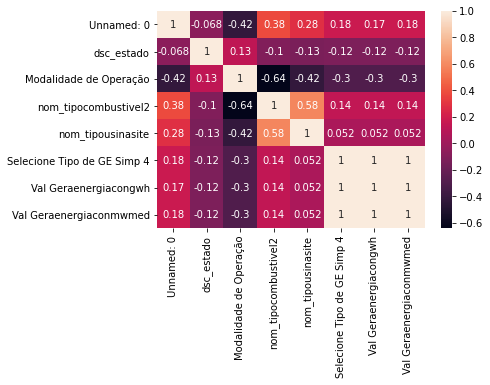

In [459]:
sns.heatmap(df1.corr(), annot=True)

In [460]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.cross_decomposition import PLSRegression

definindo entradas dos testes

In [462]:
X= df1.iloc[:, :-1]
y = df1.iloc[:, ]

In [463]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=0)

In [464]:
X_train.describe()

,Unnamed: 0,dsc_estado,Modalidade de Operação,nom_tipocombustivel2,nom_tipousinasite,Selecione Tipo de GE Simp 4,Val Geraenergiacongwh
count,38483.000000,38483.000000,38483.000000,38483.000000,38483.000000,38483.000000,38483.000000
mean,27501.824312,3.759296,4.616038,3.276746,0.863914,33.755161,24.666114
std,15883.908789,2.620127,1.312137,2.647335,1.237361,164.307749,120.110297
min,2.000000,0.000000,0.000000,0.000000,0.000000,-0.280000,-0.199800
25%,13761.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,27493.000000,4.000000,5.000000,2.000000,0.000000,7.080000,5.142949
75%,41306.500000,6.000000,5.000000,3.000000,2.000000,13.950000,10.230747
max,54976.000000,10.000000,6.000000,10.000000,3.000000,2838.160000,2064.676590


In [334]:
df['Demanda'].value_counts()

Baixo    37097
Alto      3055
Médio      960
Name: Demanda, dtype: int64

In [ ]:
#df1 = df1.drop(columns=['Din Instante GE Simp 4'])
#df1.head()

In [466]:
pls = PLSRegression().fit(X_train,y_train)

In [468]:
y_train = pls.predict(X_train)

In [475]:
print(y_test)

       Unnamed: 0  dsc_estado  ...  Val Geraenergiacongwh  Val Geraenergiaconmwmed
27919       27919           1  ...              10.800233                15.000323
15388       15388           6  ...               0.000000                 0.000000
45043       45043           7  ...               7.237658                 9.728035
22487       22487           1  ...               0.000000                 0.000000
39847       39847           7  ...               0.000000                 0.000000
...           ...         ...  ...                    ...                      ...
5286         5286           2  ...               3.698577                 5.136912
44807       44807           5  ...               0.000000                 0.000000
9855         9855           7  ...               0.000000                 0.000000
21666       21666           1  ...              12.022439                16.159192
26902       26902           7  ...               9.779531                13.144531

[16